In [1]:
## importing necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df1=pd.read_excel('online_retail_data.xlsx', sheet_name='Year 2009-2010')
df2=pd.read_excel('online_retail_data.xlsx', sheet_name='Year 2010-2011')

In [3]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
np.shape(df)

(1067371, 8)

In [5]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### Data Cleaning

In [6]:
df.loc[df['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [7]:
df = df.dropna(subset=['Customer ID']) ## dropping blank customer ids

In [8]:
df=df.loc[df['Country']!='Unspecified']

In [9]:
np.shape(df)

(823840, 8)

In [10]:
df.describe()

,Quantity,Price,Customer ID
count,823840.000000,823840.000000,823840.000000
mean,12.416276,3.675605,15325.104574
std,189.035981,70.251510,1697.361569
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15257.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# creating a column to flag cancellations

df['Cancellation Flag'] = df['Invoice'].apply(lambda x: 1 if str(x).startswith('C') else 0)

In [13]:
df.dtypes

Invoice                      object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
Price                       float64
Customer ID                 float64
Country                      object
Cancellation Flag             int64
dtype: object

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Flag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0


In [15]:
df['Net Sales']=df.apply(lambda row: row['Quantity'] * row['Price'], axis=1)

In [35]:
df.to_excel('cleaned_data.xlsx')

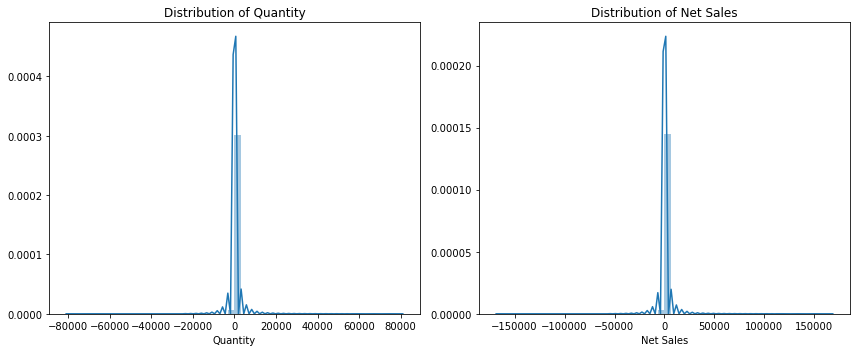

In [16]:
plt.figure(figsize=(12, 5))

# Plot the distribution of the first column
plt.subplot(1, 2, 1)
sns.distplot(df['Quantity'], kde=True)  # Use histplot for a histogram with KDE
plt.title('Distribution of Quantity')

# Plot the distribution of the second column
plt.subplot(1, 2, 2)
sns.distplot(df['Net Sales'], kde=True)  # Use histplot for a histogram with KDE
plt.title('Distribution of Net Sales')

# Show the plots
plt.tight_layout()
plt.show()

In [39]:
# df['Year'] = df['InvoiceDate'].dt.year
# df['Month'] = df['InvoiceDate'].dt.month
# df['Day'] = df['InvoiceDate'].dt.day
# df['Week_Number'] = df['InvoiceDate'].dt.week
# df['Day_of_Week'] = df['InvoiceDate'].dt.day_name()

In [40]:
df.head(8)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Flag,Net Sales,Year,Month,Day,Week_Number,Day_of_Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,83.4,2009,12,1,49,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,81.0,2009,12,1,49,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,81.0,2009,12,1,49,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,100.8,2009,12,1,49,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,30.0,2009,12,1,49,Tuesday
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,0,39.6,2009,12,1,49,Tuesday
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,30.0,2009,12,1,49,Tuesday
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,0,59.5,2009,12,1,49,Tuesday


In [17]:
df2=pd.read_excel('cleaned_data.xlsx', index_col=0)

In [18]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Flag,Net Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,0,30.0


In [20]:
# Group by 'StockCode' and aggregate 'Description' as a set of unique descriptions
stockcode_descriptions = df2.groupby('StockCode')['Description'].unique().reset_index()

# Filter stock codes with more than one unique description
differing_descriptions = stockcode_descriptions[stockcode_descriptions['Description'].apply(len) > 1]

In [21]:
df2['Description'].loc[df2['StockCode']==16011].value_counts() ## example where one stock code has multiple desc

ANIMAL STICKERS     105
 ANIMAL STICKERS     12
Name: Description, dtype: int64

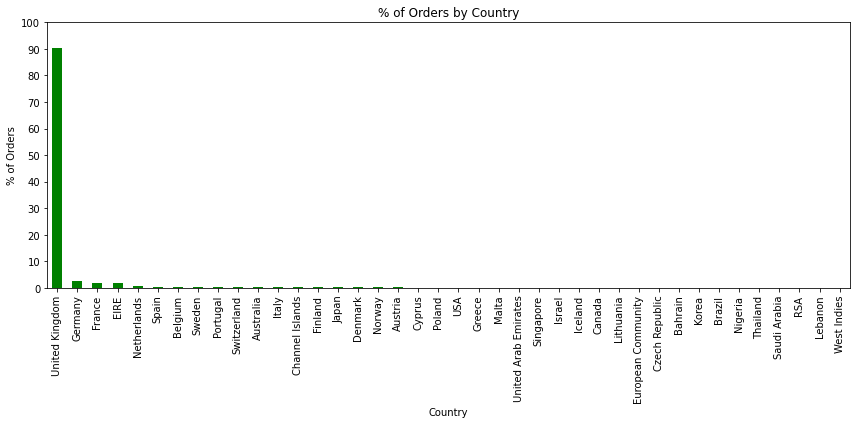

In [22]:
# Group the data by 'Country' and calculate the percentage of distinct orders from each country
country_percentage = df2.groupby('Country')['Invoice'].nunique() / df2['Invoice'].nunique() * 100

# Sort the countries by percentage in descending order
country_percentage = country_percentage.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
country_percentage.plot(kind='bar', color='green')
plt.title('% of Orders by Country')
plt.xlabel('Country')
plt.ylabel('% of Orders')
plt.xticks(rotation=90)
plt.yticks(range(0, 101, 10))
plt.tight_layout()

### RFM Analysis

In [23]:
# Convert 'InvoiceDate' to datetime
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

In [24]:
import datetime as dt
snapshot_date = max(df2.InvoiceDate) + dt.timedelta(days=1)

In [25]:
# RFM table
# Aggregate data by each customer
rfm = df2.groupby('Customer ID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'Invoice': lambda x: len(x), 'Net Sales': lambda x: x.sum()}).reset_index()
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'Net Sales': 'MonetaryValue'}, inplace=True)

In [26]:
rfm.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,12346,326,48,-64.68
1,12347,2,253,5633.32
2,12348,75,51,2019.40
3,12349,19,180,4404.54
4,12350,310,17,334.40


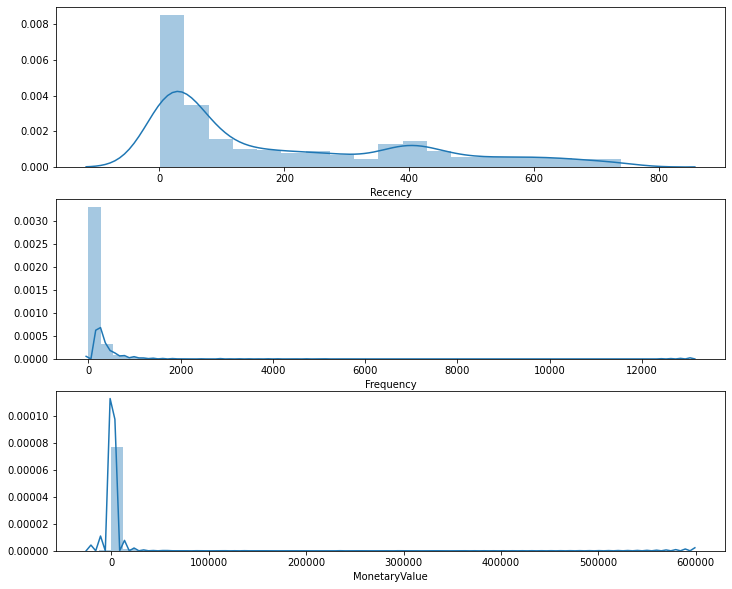

In [27]:
plt.figure(figsize=(12,10))  ## check for skewness

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])

# Show the plot
plt.show()

In [29]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    print('Log Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.log(rfm[x]).skew().round(2))
    print('Square Root Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.sqrt(rfm[x]).skew().round(2))
    print('Box-Cox Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

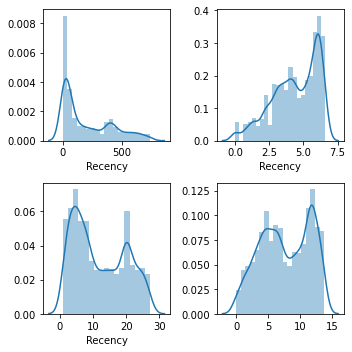

Log Transform : The skew coefficient of 0.88 to -0.62
Square Root Transform : The skew coefficient of 0.88 to 0.34
Box-Cox Transform : The skew coefficient of 0.88 to -0.13


In [30]:
analyze_skewness('Recency')

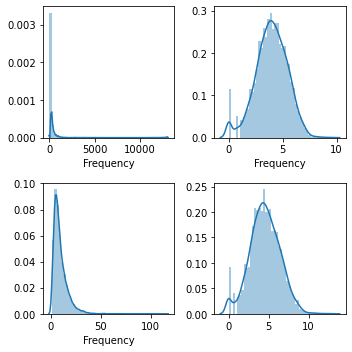

Log Transform : The skew coefficient of 18.13 to -0.28
Square Root Transform : The skew coefficient of 18.13 to 3.04
Box-Cox Transform : The skew coefficient of 18.13 to 0.0


In [31]:
analyze_skewness('Frequency')

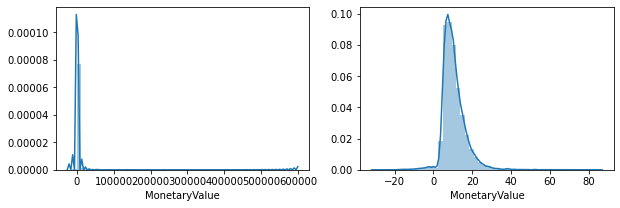

27.04
1.95


In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(rfm['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(rfm['MonetaryValue']), ax=ax[1])
plt.show()
print(rfm['MonetaryValue'].skew().round(2))
print(np.cbrt(rfm['MonetaryValue']).skew().round(2))

In [33]:
## Transforming RFM table with box-cox and cubic root

from scipy import stats
df_transformed = pd.DataFrame()
df_transformed["Recency"] = stats.boxcox(rfm['Recency'])[0]
df_transformed["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
df_transformed["MonetaryValue"] = pd.Series(np.cbrt(rfm['MonetaryValue'])).values
df_transformed.tail()

,Recency,Frequency,MonetaryValue
5930,1.599160,8.576684,13.987489
5931,11.873845,3.739540,7.586727
5932,13.397024,2.683896,7.530248
5933,12.229336,4.852242,10.592323
5934,5.625343,5.917593,16.105925


In [34]:
df_transformed.describe()

,Recency,Frequency,MonetaryValue
count,5935.000000,5935.000000,5935.000000
mean,7.695381,4.540718,10.527746
std,3.845375,1.867212,6.133437
min,0.000000,0.000000,-29.283424
25%,4.529535,3.346760,6.878797
50%,7.484730,4.494445,9.452580
75%,11.468496,5.808817,12.972040
max,13.814197,12.850858,84.259553


In [35]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(df_transformed)
df_normalized = scaler.transform(df_transformed)

In [36]:
pd.DataFrame(df_normalized).head()

,0,1,2
0,0.849180,-0.092257,-2.371116
1,-1.807914,1.095546,1.184670
2,-0.211829,-0.051025,0.344383
3,-0.956137,0.842332,0.956202
4,0.807412,-0.774978,-0.584835


In [37]:
print(df_normalized.mean(axis = 0).round(2)) 
print(df_normalized.std(axis = 0).round(2))

[ 0. -0.  0.]
[1. 1. 1.]


In [38]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

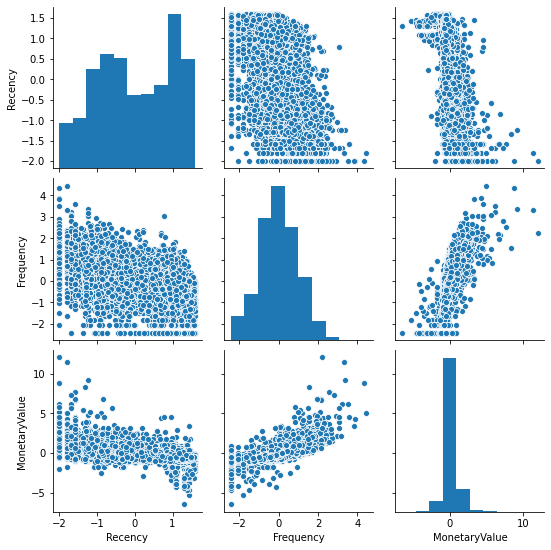

In [40]:
data = pd.DataFrame(data = df_normalized, columns = ['Recency', 'Frequency', 'MonetaryValue'])
sns.pairplot(data) # Create a matrix scatterplot

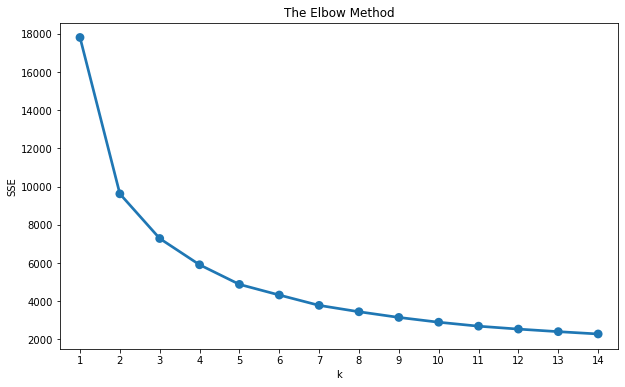

In [41]:
## Finding optimal K

plt.figure(figsize=(10,6))
K = range(1, 15)
distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    
    distortions.append(sum(np.min(cdist(df_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / df_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / df_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [42]:
## method 2: silhoutte score.. the higher the better

from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6] # Number of clusters
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_normalized)
    
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.40957460249642674
For n_clusters = 3 The average silhouette_score is : 0.3448421594240401
For n_clusters = 4 The average silhouette_score is : 0.32083716216953145
For n_clusters = 5 The average silhouette_score is : 0.3249278495240636
For n_clusters = 6 The average silhouette_score is : 0.31231938395408304


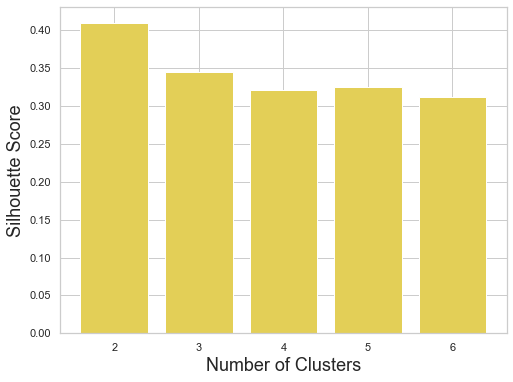

In [518]:
# Silhouette scores for different numbers of clusters
n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = [0.410, 0.345, 0.321, 0.325, 0.312]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(n_clusters, silhouette_scores, color='#E3CF57')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Silhouette Score', fontsize=18)
#plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(n_clusters)
plt.show()


In [44]:
## method 3: gap statistics to find optimal clusters...the higher, the better

%matplotlib inline
import time
import hashlib
import scipy

def optimalK(data, nrefs, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, 
                                                       #index 2 = 3 clusters are optimal


In [45]:
k, gapdf = optimalK(df_normalized, nrefs=3, maxClusters=10)

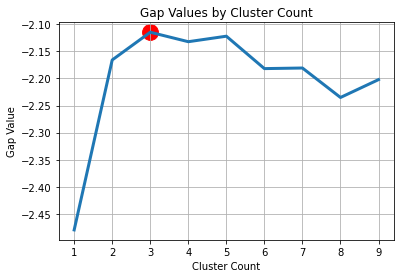

In [46]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

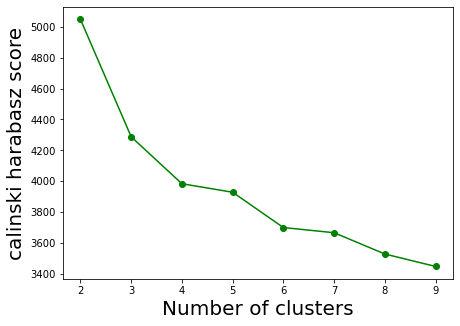

In [48]:
## method 4: calinski_harabasz_score...the higher, the better

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

num_clusters=[]
ch_score=[]

for k in range(2, 10):
    num_clusters.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_normalized)
    labels = kmeans_model.labels_
    ch_score.append(calinski_harabasz_score(df_normalized, labels))
    

plt.figure(figsize=(7,5))
plt.plot(num_clusters, ch_score, '-o', color='green')
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('calinski harabasz score',fontsize=20)
plt.show()



Text(0, 0.5, 'davies bouldin score')

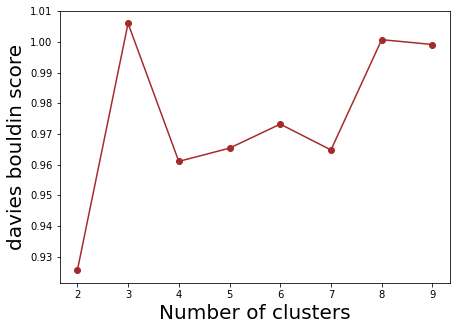

In [49]:
## method 5: davies boulding score..the closer to 0, the better

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score 

num_clusters=[]
db_score=[]

for k in range(2, 10):
    num_clusters.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_normalized)
    labels = kmeans_model.labels_
    db_score.append(davies_bouldin_score(df_normalized, labels))
    
plt.figure(figsize=(7,5))
plt.plot(num_clusters, db_score, '-o', color='brown')
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('davies bouldin score',fontsize=20)

In [58]:
## fit the model

model = KMeans(n_clusters=4, random_state=42)
model.fit(df_normalized)
model.labels_.shape
rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         333.2      82.5        1182.9  1494
1          37.6      72.0        1119.8  1834
2         416.5      12.1         187.4  1431
3          34.5     468.8       10673.3  1176

In [527]:
df_rfm=rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean']}).round(1)
df_rfm

,Recency,Frequency,MonetaryValue
,mean,mean,mean
Cluster,,,
0,333.2,82.5,1182.9
1,37.6,72.0,1119.8
2,416.5,12.1,187.4
3,34.5,468.8,10673.3


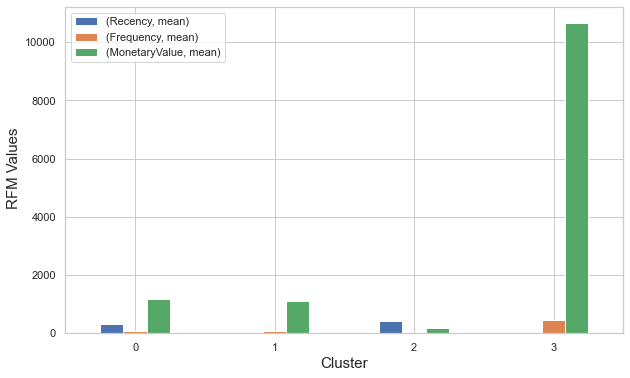

In [535]:


# Create a bar chart color-coded with clusters
ax = df_rfm.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.xlabel('Cluster', fontsize=15)
plt.ylabel(' RFM Values', fontsize=15)
plt.xticks(rotation=0)
#plt.title('Cluster Analysis')
plt.legend()
# Show the plot
plt.show()




In [59]:
rfm.head()

,Customer ID,Recency,Frequency,MonetaryValue,Cluster
0,12346,326,48,-64.68,2
1,12347,2,253,5633.32,3
2,12348,75,51,2019.40,1
3,12349,19,180,4404.54,3
4,12350,310,17,334.40,2


In [60]:
data = pd.DataFrame(data = df_normalized, columns = ['Recency', 'Frequency', 'MonetaryValue'])
data["Cluster"] = model.labels_

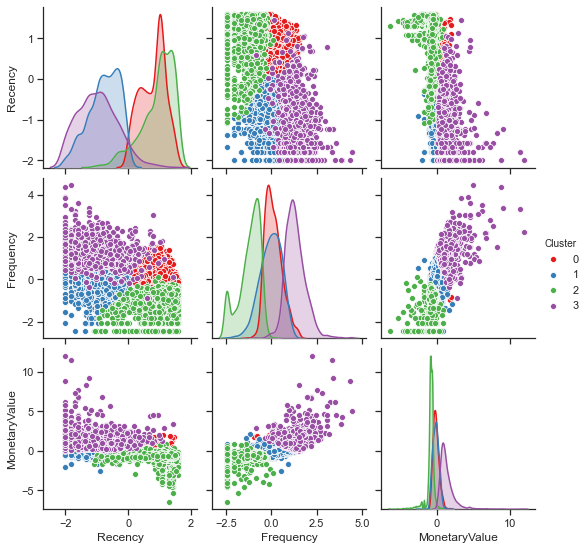

In [61]:
# Set the style and color palette
sns.set(style="ticks")
palette = "Set1"

# Create the pairplot
sns.pairplot(data, hue="Cluster", palette=palette, diag_kind="kde")

# Show the pairplot
plt.show()

In [ ]:
## segment interpretation
cluster 0: at risk customer
cluster 1: new customers
cluster 2: lost customers 
cluster 3: loyal customers

In [62]:
cluster_avg = rfm[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','MonetaryValue']].head().mean()

In [63]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,1.28,-0.25,-0.52
1,-0.74,-0.34,-0.55
2,1.85,-0.89,-0.92
3,-0.76,3.27,3.33


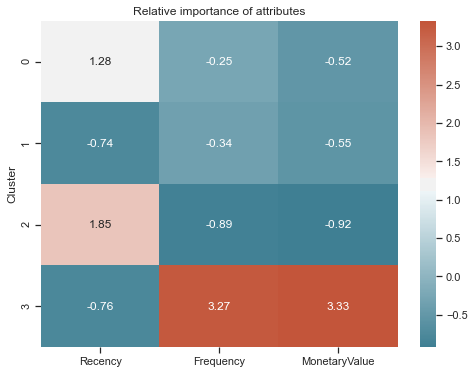

In [64]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 6))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)

In [65]:
# Create a mapping dictionary from df1
mapping_dict = rfm.set_index("Customer ID")["Cluster"].to_dict()

# Map cluster numbers from df1 to df2 based on Customer ID
df2["Segment"] = df2["Customer ID"].map(mapping_dict)

In [67]:
len(df2['Cancellation Flag'].loc[(df2['Segment']==1) & (df2['Cancellation Flag']==1)])/len(df2['Cancellation Flag'].loc[df2['Segment']==1])


0.02136172469973099

In [68]:
# Group the data by 'Segment' and 'Cancellation Flag' and calculate the percentage
result_df = df2.groupby(['Segment', 'Cancellation Flag']).size().unstack(fill_value=0)
result_df['Percentage of Cancellations'] = (result_df[1] / result_df.sum(axis=1)) * 100

# Reset the index to have 'Segment' and 'Cancellation Flag' as regular columns
#result_df = result_df.reset_index()

In [69]:
result_df

Cancellation Flag,0,1,Percentage of Cancellations
Segment,,,
0,120581,2629,2.133755
1,129146,2819,2.136172
2,16588,735,4.242914
3,538784,12558,2.277715


In [ ]:
## %history -g

In [70]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Flag,Net Sales,Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,0,83.4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,0,81.0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,0,81.0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,0,100.8,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,0,30.0,0


### Customer Lifetime Value

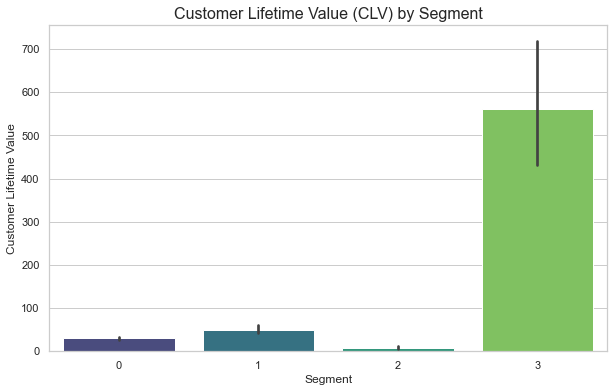

In [521]:
## CLV by customer

df=df2

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the average order total per customer per segment
average_order_total = df.groupby(['Customer ID', 'Segment'])['Net Sales'].mean().reset_index()

# Calculate the average number of purchases in a year per customer per segment
df['Year'] = df['InvoiceDate'].dt.year
average_purchases_per_year = df.groupby(['Customer ID', 'Segment', 'Year'])['Invoice'].nunique().mean(level=[0, 1]).reset_index()
average_purchases_per_year = average_purchases_per_year.rename(columns={'Invoice': 'Average Purchases per Year'})

# Calculate the average retention time in years per customer per segment
retention_time = df.groupby(['Customer ID', 'Segment'])['Year'].max() - df.groupby(['Customer ID', 'Segment'])['Year'].min()
retention_time = retention_time.reset_index()
retention_time = retention_time.rename(columns={'Year': 'Retention Time'})

# Calculate the customer lifetime value (CLV) per customer per segment
clv_data = pd.merge(average_order_total, average_purchases_per_year, on=['Customer ID', 'Segment'])
clv_data = pd.merge(clv_data, retention_time, on=['Customer ID', 'Segment'])
clv_data['Customer Lifetime Value'] = clv_data['Net Sales'] * clv_data['Average Purchases per Year'] * clv_data['Retention Time']

# Create a DataFrame from the CLV data
clv_df = clv_data[['Segment', 'Customer ID', 'Customer Lifetime Value']]

# Set the style
#sns.set(style="whitegrid")

# Create a bar plot for CLV
plt.figure(figsize=(10, 6))
sns.barplot(data=clv_df, x='Segment', y='Customer Lifetime Value', palette="viridis")
plt.title('Customer Lifetime Value (CLV) by Segment', fontsize=16)
plt.ylabel('Customer Lifetime Value')

# Show the plot
plt.show()


In [87]:
clv_data

,Customer ID,Segment,Net Sales,Average Purchases per Year,Retention Time,Customer Lifetime Value
0,12346,2,-1.347500,5.666667,2,-15.271667
1,12347,3,22.266087,4.000000,1,89.064348
2,12348,1,39.596078,2.500000,1,98.990196
3,12349,3,24.469667,1.666667,2,81.565556
4,12350,2,19.670588,1.000000,0,0.000000
...,...,...,...,...,...,...
5930,18283,3,2.775507,11.000000,1,30.530578
5931,18284,0,15.057931,2.000000,0,0.000000
5932,18285,2,35.583333,1.000000,0,0.000000
5933,18286,0,16.977571,1.500000,1,25.466357
